In [1]:
%matplotlib inline

In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from Inputs import Inputs

In [4]:
import prep

In [5]:
sess = keras.backend.get_session()

In [6]:
batch_size = 10

In [7]:
train_images, train_labels, valid_images, valid_labels, n_classes = prep.prepare_data('/run/media/backman/yay/dogbreed/')

In [8]:
len(train_images)

10222

In [9]:
train_inputs = Inputs(train_images, train_labels, n_classes, shuffle = True, batch_size = batch_size)
steps_per_epoch = int(np.floor(train_inputs.size / batch_size))

In [10]:
with tf.device('/cpu:0'):
            iterator_train = train_inputs.generate_iterator()
next_input, next_output = iterator_train.get_next()


Instructions for updating:
Use `tf.data.Dataset.from_tensor_slices()`.
Instructions for updating:
Replace `num_threads=T` with `num_parallel_calls=T`. Replace `output_buffer_size=N` with `ds.prefetch(N)` on the returned dataset.
Instructions for updating:
Replace `num_threads=T` with `num_parallel_calls=T`. Replace `output_buffer_size=N` with `ds.prefetch(N)` on the returned dataset.


In [11]:
model = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=next_input, input_shape=None, pooling=None, classes=1000)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [12]:
model.layers.pop()
x = keras.layers.Input(tensor=next_input)
x = keras.layers.Dense(n_classes, name = "predictions")(model.layers[-1].output)
model = keras.models.Model(inputs=model.layers[0].input, outputs=x)

In [13]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [14]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),
       loss='categorical_crossentropy', metrics=['accuracy'], target_tensors=[next_output])

In [15]:
sess.run(iterator_train.initializer)
model.fit(steps_per_epoch = steps_per_epoch)
model.save_weights("dogs.h5")

Epoch 1/1
1022/1022 [==============================] - 306s - loss: 8.6693 - acc: 0.0088   


In [16]:
model.load_weights("dogs.h5")

In [17]:
l = model.layers

In [18]:
l[-3].output

<tf.Tensor 'avg_pool/AvgPool:0' shape=(?, 1, 1, 2048) dtype=float32>

In [19]:
conv_fn = keras.backend.function([l[0].input, keras.backend.learning_phase()], [l[-4].output])

In [20]:
def get_cm2(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (360,640))

In [21]:
sess.run(iterator_train.initializer)


In [22]:
np_array = sess.run(next_input[0])

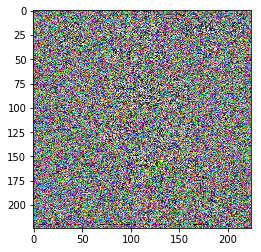

In [23]:
plt.imshow(np_array)